# Predicting employee salary using Machine Learning

This notebook looks into using linear regression in an attempt to build a machine learning model capable of predicting a new
employee's salary based on their years of experience.

We're going to take the follow approach:

    1. Problem Defintiion
    2. Data
    3. Evaluation
    4. Features
    5. Modelling
    6. Experimentation

## 1. Problem Definition

>In a statement,
    Given parameters of employees years of work experience and salaries, can we predict a new employee's salary?

## 2. Data

>This data consists of salary and years of experience of 35 jobholders. The data is a download csv file from Kaggle: https://www.kaggle.com/datasets/rsadiq/salary?resource=download

## 3. Evaluation

> If we can reach 95% accuracy at predicting a candidates salary during proof of concenpt, we'll pursue the project

## 4. Features

>The following is the feature we will use to predict our taget variable(salary).


1. YearsExperience - years as a foating point number

## Preparing the tools

In [1]:
# Exploratory and plotting libraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Load Data

In [2]:
df = pd.read_csv("salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### Explorarity Data Aanalysis

In [3]:
len(df)

35

In [4]:
# First 10 rows
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
# Last 10 rows
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [6]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [7]:
# Check for null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
# view columns
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [9]:
df["YearsExperience"].max()

13.5

Text(0, 0.5, 'Persons')

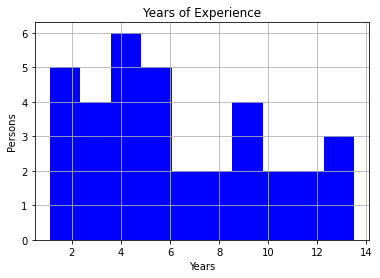

In [10]:
# Distribution of Years of Experience
df["YearsExperience"].hist(color="blue")
plt.title("Years of Experience")
plt.xlabel("Years")
plt.ylabel("Persons")

In [11]:
# Salary descriptive statistics
df["Salary"].describe()

count        35.000000
mean      83945.600000
std       32162.673003
min       37731.000000
25%       57019.000000
50%       81363.000000
75%      113223.500000
max      139465.000000
Name: Salary, dtype: float64

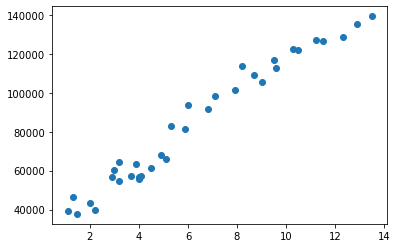

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["YearsExperience"], df["Salary"])

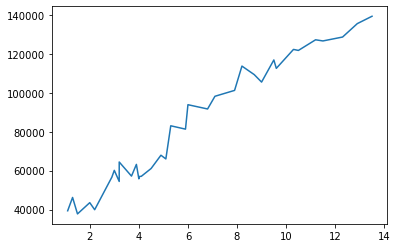

In [13]:
fig, ax = plt.subplots()
ax.plot(df["YearsExperience"], df["Salary"])

In [14]:
# correlation of feature and label
corr_mat = df.corr()
corr_mat.style.background_gradient(cmap='Blues_r')

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


 ## Modelling

In [15]:
# Create evaluation helper function
def eval_scores(model):
    y_preds = model.predict(X_test)
    scores= {"r2_score": r2_score(y_test, y_preds),
            "mean_absolute_error": mean_absolute_error(y_test, y_preds),
            "mean_squared_error": mean_squared_error(y_test, y_preds)}
    return scores

In [16]:
#Split X/y

X = df.drop("Salary",axis= 1)
y = df["Salary"]

In [17]:
#Split train/

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

### First Model: SGDRegressor() 

In [18]:
#Instantiate model and Fit data to model
model_1 = SGDRegressor()

model_1.fit(X_train, y_train)


SGDRegressor()

##### Baseline result of model_1
The model produced an r2_score of 96.2%

In [19]:
eval_scores(model_1)

{'r2_score': 0.7718898524037573,
 'mean_absolute_error': 12524.842466765764,
 'mean_squared_error': 188069297.83814445}

### Second Model: RandomForestRegressor()

In [20]:
#Instantiate model and fit data to model
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)

RandomForestRegressor()

##### Baseline result of model_2
The model produced an r2_score of 97.5%

In [21]:
eval_scores(model_2)

{'r2_score': 0.9274940516958313,
 'mean_absolute_error': 6247.700714285716,
 'mean_squared_error': 59778764.47123217}

# Experimentation

## Hyperparameter tuning with RandomizedSearchCV

We are moving forward with the model with the highest coefficient of determinats score, model_2

In [22]:
model_2

RandomForestRegressor()

In [23]:
# Different RandomForestClassifier hyperparameters
rs_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

In [24]:
# Instantiate RandomizeSearchCV model
rs_model = RandomizedSearchCV(estimator= model_2,
                              param_distributions= rs_grid,
                              n_iter= 20,
                              cv= 5,
                              verbose= True)

In [25]:
# Fit RandomizeSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [26]:
#View best parameteres for the RandomizedSearch Cv
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 3}

In [27]:
# Evaluate RandomizedSearch model
eval_scores(rs_model)

{'r2_score': 0.9380231157271255,
 'mean_absolute_error': 5584.608687384045,
 'mean_squared_error': 51097898.231281675}

### Train Model with best parameters (best_params_)

In [38]:
# Instantiate model
model_3 = RandomForestRegressor(n_estimators=40,
                               min_samples_split=6,
                               min_samples_leaf=5,
                               max_features='auto',
                               max_depth=3)

# Fit model
model_3.fit(X_train, y_train)

# Score model
eval_scores(model_3)

{'r2_score': 0.7744371470972106,
 'mean_absolute_error': 11549.230326511935,
 'mean_squared_error': 185969137.32607222}

# Salary Prediction model

In [36]:
num_years = int(input("How many years experience do you have? "))
salary_predict = model_3.predict([[num_years]])
print(f"Your salary is predicted to be approximately ${int(salary_predict)}")

How many years experience do you have? 2
Your salary is predicted to be approximately $52251
